# Calculate heights and depths of major clades

 - Major clades: Archaea, Eubacteria and CPR.
 - Height: distance from root to LCA.
 - Depth: distance from LCA to tip.

In [1]:
from statistics import median
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from skbio import TreeNode

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.figsize'] = (10, 3)

Input tree

In [4]:
title = 'astral.cons'

In [5]:
tree = TreeNode.read('trees/%s.nwk' % title)
tree.count(tips=True)

10575

In [6]:
def get_depths(ancestor, tips):
    """Generate a list of radius of each tip to a given ancestral node."""
    return [x.distance(ancestor) for x in tips]

In [7]:
depths, stats = {}, {}

Origin of tree (the shared ancestor of all major clades)

In [8]:
origin_id = 'N3'
origin = tree.find(origin_id)

Measure the entire tree

In [9]:
depths['origin'] = get_depths(origin, tree.tips())
stats['origin'] = pd.Series(depths['origin']).describe()

Clades to measure

In [10]:
clades = {'N2': 'Archaea', 'N6': 'CPR', 'N7': 'Eubacteria'}
colors = {'Archaea': '#503e94', 'CPR': '#d48272', 'Eubacteria': '#60c0c2'}

Measure each clade

In [11]:
heights = {}
for id_, name in clades.items():
    node = tree.find(id_)
    heights[name] = node.distance(origin)
    depths[name] = get_depths(node, node.tips())
    stats[name] = pd.Series(depths[name]).describe()

In [12]:
print('Heights:')
for name, height in heights.items():
    print('  %s: %s' % (name, height))

Heights:
  Archaea: 0.122142081
  CPR: 0.0631847031
  Eubacteria: 0.0587419885


In [13]:
print('Median depths:')
for name, stat in stats.items():
    print('  %s: %.9f' % (name, stat['50%']))

Median depths:
  origin: 0.917172431
  Archaea: 0.900000871
  CPR: 0.954960860
  Eubacteria: 0.827028050


Plotting

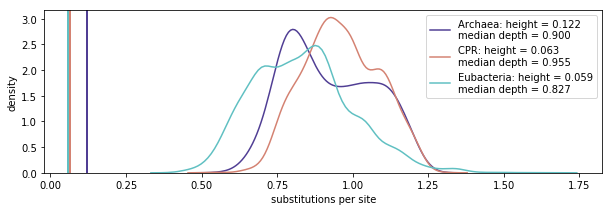

In [14]:
fig, ax = plt.subplots()
legends = []
for name in clades.values():
    color = colors[name]
    depth = stats[name]['50%']
    height = heights[name]
    sns.distplot(depths[name], hist=False, color=color, ax=ax)
    plt.axvline(x=height, color=color, linewidth=2)
    label = '%s: height = %.3f\nmedian depth = %.3f' % (name, height, depth)
    legends.append(Line2D([0], [0], color=color, label=label))
ax.legend(handles=legends, loc='best')
ax.set_xlabel('substitutions per site')
ax.set_ylabel('density');

In [15]:
plt.tight_layout()
fig.savefig('%s.pdf' % title, bbox_to_inches='tight')

<Figure size 720x216 with 0 Axes>